In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical #for one hot encoding
from keras import optimizers

#To make it compatible with jupyter notebook
%matplotlib inline
# Fixing random state for reproducibility\n
np.random.seed(1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import Model
from keras.utils import np_utils
from keras import initializers

## Load DataSet

In [0]:
from keras.datasets import cifar10
(train_set_X, train_set_Y), (test_set_X, test_set_Y) = cifar10.load_data()

In [17]:
def print_shapes_of_dataset():
  print("Train X shape: \t" + str(train_set_X.shape))
  print("Train Y shape: \t" + str(train_set_Y.shape))
  print("Test X shape: \t" + str(test_set_X.shape))
  print("Test Y shape: \t" + str(test_set_Y.shape))

print_shapes_of_dataset()

Train X shape: 	(50000, 32, 32, 3)
Train Y shape: 	(50000, 1)
Test X shape: 	(10000, 32, 32, 3)
Test Y shape: 	(10000, 1)


In [18]:
input_shape = train_set_X.shape[1:]
print(input_shape)

(32, 32, 3)


In [19]:
# one hot encode
encoded_train_Y = to_categorical(train_set_Y)
encoded_train_Y = encoded_train_Y.reshape(encoded_train_Y.shape[0], encoded_train_Y.shape[1])

print(encoded_train_Y.shape)

# one hot encode
encoded_test_Y = to_categorical(test_set_Y)
encoded_test_Y = encoded_test_Y.reshape(encoded_test_Y.shape[0], encoded_test_Y.shape[1])

print(encoded_test_Y.shape)

(50000, 10)
(10000, 10)


## Own Network Architecture

In [0]:
#Define model
model = Sequential()

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = input_shape,
                 name = 'conv_layer_1', kernel_initializer = initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), bias_initializer='zeros'))

model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = input_shape,
                 name = 'conv_layer_2', kernel_initializer = initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), bias_initializer='zeros'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name='max_pool_layer_1'))

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(64, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_3', kernel_initializer = initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), bias_initializer='zeros'))

model.add(Conv2D(64, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_4', kernel_initializer = initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), bias_initializer='zeros'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name='max_pool_layer_2'))

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(128, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_5', kernel_initializer = initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), bias_initializer='zeros'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name = 'max_pool_layer_3'))

#Add a layer that will flatten out the tensor
model.add(Flatten(name = 'flatten_layer_1'))

#Add a final dense layer that will be used for prediction
model.add(Dense(1024, activation = 'relu', name='dense_layer_1', kernel_initializer = initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), bias_initializer='zeros'))

#Add a final dense layer that will be used for prediction
model.add(Dense(encoded_train_Y.shape[1], activation = 'softmax',name='final_layer', kernel_initializer = initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), bias_initializer='zeros'))

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_layer_1 (Conv2D)        (None, 30, 30, 32)        896       
_________________________________________________________________
conv_layer_2 (Conv2D)        (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pool_layer_1 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv_layer_3 (Conv2D)        (None, 12, 12, 64)        18496     
_________________________________________________________________
conv_layer_4 (Conv2D)        (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pool_layer_2 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv_layer_5 (Conv2D)        (None, 3, 3, 128)         73856     
__________

## Training Model

In [0]:
#Compile the model tell which loss to use and the optimizer and a evaluation metric if any
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.SGD(lr=0.001, decay=1e-6),
              metrics=['accuracy'])

In [23]:
history_1 = model.fit(train_set_X, encoded_train_Y,
          batch_size = 100,
          epochs = 100,
          validation_data = (test_set_X, encoded_test_Y))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 21s 428us/step - loss: 2.0623 - acc: 0.2563 - val_loss: 1.8313 - val_acc: 0.3290
Epoch 2/100
42400/50000 [========================>.....] - ETA: 2s - loss: 1.7882 - acc: 0.3493

50000/50000 [==============================] - 21s 412us/step - loss: 1.7779 - acc: 0.3545 - val_loss: 1.7003 - val_acc: 0.3838
Epoch 3/100
50000/50000 [==============================] - 21s 412us/step - loss: 1.6645 - acc: 0.3965 - val_loss: 1.6389 - val_acc: 0.4143
Epoch 4/100
20300/50000 [===========>..................] - ETA: 11s - loss: 1.6086 - acc: 0.4204

50000/50000 [==============================] - 21s 412us/step - loss: 1.5949 - acc: 0.4255 - val_loss: 1.5420 - val_acc: 0.4414
Epoch 5/100
50000/50000 [==============================] - 20s 410us/step - loss: 1.5422 - acc: 0.4477 - val_loss: 1.4954 - val_acc: 0.4614
Epoch 6/100
15800/50000 [========>.....................] - ETA: 12s - loss: 1.4973 - acc: 0.4623

50000/50000 [==============================] - 21s 416us/step - loss: 1.4914 - acc: 0.4656 - val_loss: 1.5256 - val_acc: 0.4562
Epoch 7/100
50000/50000 [==============================] - 13s 255us/step - loss: 1.4494 - acc: 0.4841 - val_loss: 1.4433 - val_acc: 0.4818
Epoch 8/100
35700/50000 [====================>.........] - ETA: 2s - loss: 1.4185 - acc: 0.4939

50000/50000 [==============================] - 11s 223us/step - loss: 1.4152 - acc: 0.4964 - val_loss: 1.4656 - val_acc: 0.4692
Epoch 9/100
50000/50000 [==============================] - 11s 226us/step - loss: 1.3761 - acc: 0.5102 - val_loss: 1.4551 - val_acc: 0.4734
Epoch 10/100
47200/50000 [===========================>..] - ETA: 0s - loss: 1.3498 - acc: 0.5202

50000/50000 [==============================] - 11s 224us/step - loss: 1.3469 - acc: 0.5214 - val_loss: 1.3548 - val_acc: 0.5103
Epoch 11/100
50000/50000 [==============================] - 11s 227us/step - loss: 1.3171 - acc: 0.5318 - val_loss: 1.3592 - val_acc: 0.5184
Epoch 12/100
48500/50000 [============================>.]

50000/50000 [==============================] - 12s 230us/step - loss: 1.2928 - acc: 0.5420 - val_loss: 1.3217 - val_acc: 0.5245
Epoch 13/100
50000/50000 [==============================] - 13s 261us/step - loss: 1.2672 - acc: 0.5517 - val_loss: 1.3047 - val_acc: 0.5381
Epoch 14/100
30800/50000 [=================>............] - ETA: 7s - loss: 1.2604 - acc: 0.5552

50000/50000 [==============================] - 21s 415us/step - loss: 1.2495 - acc: 0.5586 - val_loss: 1.2991 - val_acc: 0.5393
Epoch 15/100
50000/50000 [==============================] - 21s 417us/step - loss: 1.2254 - acc: 0.5693 - val_loss: 1.2588 - val_acc: 0.5491
Epoch 16/100
17800/50000 [=========>....................] - ETA: 12s - loss: 1.2039 - acc: 0.5796

50000/50000 [==============================] - 21s 420us/step - loss: 1.2077 - acc: 0.5750 - val_loss: 1.2911 - val_acc: 0.5421
Epoch 17/100
50000/50000 [==============================] - 21s 415us/step - loss: 1.1897 - acc: 0.5835 - val_loss: 1.2646 - val_acc: 0.5566
Epoch 18/100
14800/50000 [=======>......................] - ETA: 13s - loss: 1.1613 - acc: 0.5947

50000/50000 [==============================] - 21s 419us/step - loss: 1.1700 - acc: 0.5879 - val_loss: 1.2770 - val_acc: 0.5484
Epoch 19/100
50000/50000 [==============================] - 21s 415us/step - loss: 1.1543 - acc: 0.5952 - val_loss: 1.2469 - val_acc: 0.5592
Epoch 20/100
13700/50000 [=======>......................] - ETA: 14s - loss: 1.1528 - acc: 0.5979

50000/50000 [==============================] - 21s 422us/step - loss: 1.1418 - acc: 0.6001 - val_loss: 1.1908 - val_acc: 0.5784
Epoch 21/100
50000/50000 [==============================] - 21s 422us/step - loss: 1.1242 - acc: 0.6065 - val_loss: 1.1964 - val_acc: 0.5783
Epoch 22/100
14300/50000 [=======>......................] - ETA: 14s - loss: 1.1113 - acc: 0.6086

50000/50000 [==============================] - 21s 421us/step - loss: 1.1071 - acc: 0.6117 - val_loss: 1.1990 - val_acc: 0.5808
Epoch 23/100
50000/50000 [==============================] - 21s 418us/step - loss: 1.0957 - acc: 0.6184 - val_loss: 1.2112 - val_acc: 0.5728
Epoch 24/100
14400/50000 [=======>......................] - ETA: 13s - loss: 1.0745 - acc: 0.6219

50000/50000 [==============================] - 21s 416us/step - loss: 1.0819 - acc: 0.6214 - val_loss: 1.1771 - val_acc: 0.5881
Epoch 25/100
50000/50000 [==============================] - 21s 419us/step - loss: 1.0705 - acc: 0.6274 - val_loss: 1.1698 - val_acc: 0.5890
Epoch 26/100
14000/50000 [=======>......................] - ETA: 14s - loss: 1.0539 - acc: 0.6324

50000/50000 [==============================] - 21s 418us/step - loss: 1.0583 - acc: 0.6308 - val_loss: 1.1825 - val_acc: 0.5851
Epoch 27/100
50000/50000 [==============================] - 21s 418us/step - loss: 1.0483 - acc: 0.6357 - val_loss: 1.2313 - val_acc: 0.5815
Epoch 28/100
14100/50000 [=======>......................] - ETA: 13s - loss: 1.0316 - acc: 0.6398

50000/50000 [==============================] - 21s 414us/step - loss: 1.0334 - acc: 0.6401 - val_loss: 1.1970 - val_acc: 0.5862
Epoch 29/100
50000/50000 [==============================] - 21s 416us/step - loss: 1.0197 - acc: 0.6445 - val_loss: 1.1369 - val_acc: 0.6058
Epoch 30/100
14400/50000 [=======>......................] - ETA: 13s - loss: 1.0008 - acc: 0.6527

50000/50000 [==============================] - 21s 413us/step - loss: 1.0133 - acc: 0.6493 - val_loss: 1.1754 - val_acc: 0.5875
Epoch 31/100
50000/50000 [==============================] - 21s 417us/step - loss: 1.0014 - acc: 0.6532 - val_loss: 1.1554 - val_acc: 0.5994
Epoch 32/100
13000/50000 [======>.......................] - ETA: 14s - loss: 0.9917 - acc: 0.6581

50000/50000 [==============================] - 21s 420us/step - loss: 0.9852 - acc: 0.6603 - val_loss: 1.1373 - val_acc: 0.6114
Epoch 33/100
50000/50000 [==============================] - 21s 417us/step - loss: 0.9802 - acc: 0.6583 - val_loss: 1.1727 - val_acc: 0.5999
Epoch 34/100
14100/50000 [=======>......................] - ETA: 14s - loss: 0.9637 - acc: 0.6655

50000/50000 [==============================] - 21s 418us/step - loss: 0.9699 - acc: 0.6631 - val_loss: 1.1397 - val_acc: 0.5992
Epoch 35/100
50000/50000 [==============================] - 21s 420us/step - loss: 0.9582 - acc: 0.6678 - val_loss: 1.1739 - val_acc: 0.5942
Epoch 36/100
13800/50000 [=======>......................] - ETA: 14s - loss: 0.9318 - acc: 0.6754

50000/50000 [==============================] - 21s 420us/step - loss: 0.9468 - acc: 0.6715 - val_loss: 1.1708 - val_acc: 0.5957
Epoch 37/100
50000/50000 [==============================] - 21s 419us/step - loss: 0.9404 - acc: 0.6756 - val_loss: 1.1191 - val_acc: 0.6165
Epoch 38/100
13200/50000 [======>.......................] - ETA: 14s - loss: 0.9286 - acc: 0.6810

50000/50000 [==============================] - 21s 421us/step - loss: 0.9309 - acc: 0.6762 - val_loss: 1.1340 - val_acc: 0.6120
Epoch 39/100
50000/50000 [==============================] - 21s 418us/step - loss: 0.9230 - acc: 0.6805 - val_loss: 1.1157 - val_acc: 0.6192
Epoch 40/100
13300/50000 [======>.......................] - ETA: 14s - loss: 0.9059 - acc: 0.6831

50000/50000 [==============================] - 21s 421us/step - loss: 0.9092 - acc: 0.6842 - val_loss: 1.1188 - val_acc: 0.6102
Epoch 41/100
50000/50000 [==============================] - 21s 419us/step - loss: 0.9050 - acc: 0.6866 - val_loss: 1.1138 - val_acc: 0.6190
Epoch 42/100
14700/50000 [=======>......................] - ETA: 13s - loss: 0.9043 - acc: 0.6871

50000/50000 [==============================] - 20s 408us/step - loss: 0.8957 - acc: 0.6901 - val_loss: 1.0955 - val_acc: 0.6273
Epoch 43/100
50000/50000 [==============================] - 21s 419us/step - loss: 0.8867 - acc: 0.6915 - val_loss: 1.1187 - val_acc: 0.6195
Epoch 44/100
14300/50000 [=======>......................] - ETA: 14s - loss: 0.8761 - acc: 0.6943

50000/50000 [==============================] - 21s 414us/step - loss: 0.8773 - acc: 0.6954 - val_loss: 1.1184 - val_acc: 0.6204
Epoch 45/100
50000/50000 [==============================] - 21s 419us/step - loss: 0.8674 - acc: 0.7009 - val_loss: 1.1117 - val_acc: 0.6205
Epoch 46/100
14300/50000 [=======>......................] - ETA: 14s - loss: 0.8636 - acc: 0.7004

50000/50000 [==============================] - 21s 415us/step - loss: 0.8624 - acc: 0.7007 - val_loss: 1.0950 - val_acc: 0.6239
Epoch 47/100
50000/50000 [==============================] - 21s 415us/step - loss: 0.8499 - acc: 0.7063 - val_loss: 1.1013 - val_acc: 0.6216
Epoch 48/100
14800/50000 [=======>......................] - ETA: 13s - loss: 0.8309 - acc: 0.7115

50000/50000 [==============================] - 21s 416us/step - loss: 0.8458 - acc: 0.7070 - val_loss: 1.1190 - val_acc: 0.6206
Epoch 49/100
50000/50000 [==============================] - 21s 415us/step - loss: 0.8347 - acc: 0.7103 - val_loss: 1.1011 - val_acc: 0.6252
Epoch 50/100
14500/50000 [=======>......................] - ETA: 13s - loss: 0.8140 - acc: 0.7189

50000/50000 [==============================] - 21s 413us/step - loss: 0.8263 - acc: 0.7139 - val_loss: 1.0937 - val_acc: 0.6220
Epoch 51/100
50000/50000 [==============================] - 21s 411us/step - loss: 0.8202 - acc: 0.7139 - val_loss: 1.1107 - val_acc: 0.6267
Epoch 52/100
14500/50000 [=======>......................] - ETA: 13s - loss: 0.8034 - acc: 0.7204

50000/50000 [==============================] - 21s 412us/step - loss: 0.8092 - acc: 0.7210 - val_loss: 1.1428 - val_acc: 0.6150
Epoch 53/100
50000/50000 [==============================] - 20s 409us/step - loss: 0.8046 - acc: 0.7210 - val_loss: 1.1307 - val_acc: 0.6227
Epoch 54/100
14500/50000 [=======>......................] - ETA: 13s - loss: 0.7814 - acc: 0.7287

50000/50000 [==============================] - 21s 416us/step - loss: 0.7926 - acc: 0.7257 - val_loss: 1.0843 - val_acc: 0.6374
Epoch 55/100
50000/50000 [==============================] - 21s 419us/step - loss: 0.7854 - acc: 0.7270 - val_loss: 1.1074 - val_acc: 0.6285
Epoch 56/100
14700/50000 [=======>......................] - ETA: 13s - loss: 0.7790 - acc: 0.7331

50000/50000 [==============================] - 21s 412us/step - loss: 0.7809 - acc: 0.7301 - val_loss: 1.1190 - val_acc: 0.6217
Epoch 57/100
50000/50000 [==============================] - 21s 422us/step - loss: 0.7718 - acc: 0.7338 - val_loss: 1.1295 - val_acc: 0.6215
Epoch 58/100
13700/50000 [=======>......................] - ETA: 14s - loss: 0.7470 - acc: 0.7441

50000/50000 [==============================] - 21s 413us/step - loss: 0.7647 - acc: 0.7361 - val_loss: 1.1026 - val_acc: 0.6303
Epoch 59/100
50000/50000 [==============================] - 21s 420us/step - loss: 0.7581 - acc: 0.7377 - val_loss: 1.0980 - val_acc: 0.6336
Epoch 60/100
14100/50000 [=======>......................] - ETA: 14s - loss: 0.7480 - acc: 0.7442

50000/50000 [==============================] - 21s 421us/step - loss: 0.7509 - acc: 0.7424 - val_loss: 1.1246 - val_acc: 0.6289
Epoch 61/100
50000/50000 [==============================] - 21s 419us/step - loss: 0.7456 - acc: 0.7432 - val_loss: 1.0952 - val_acc: 0.6390
Epoch 62/100
13500/50000 [=======>......................] - ETA: 13s - loss: 0.7303 - acc: 0.7460

50000/50000 [==============================] - 21s 416us/step - loss: 0.7340 - acc: 0.7468 - val_loss: 1.1002 - val_acc: 0.6373
Epoch 63/100
50000/50000 [==============================] - 21s 419us/step - loss: 0.7280 - acc: 0.7491 - val_loss: 1.1564 - val_acc: 0.6196
Epoch 64/100
14300/50000 [=======>......................] - ETA: 13s - loss: 0.7163 - acc: 0.7521

50000/50000 [==============================] - 21s 416us/step - loss: 0.7210 - acc: 0.7511 - val_loss: 1.0991 - val_acc: 0.6356
Epoch 65/100
50000/50000 [==============================] - 21s 416us/step - loss: 0.7125 - acc: 0.7555 - val_loss: 1.1370 - val_acc: 0.6267
Epoch 66/100
14100/50000 [=======>......................] - ETA: 13s - loss: 0.6958 - acc: 0.7579

50000/50000 [==============================] - 21s 420us/step - loss: 0.7079 - acc: 0.7547 - val_loss: 1.1192 - val_acc: 0.6362
Epoch 67/100
50000/50000 [==============================] - 21s 421us/step - loss: 0.6999 - acc: 0.7570 - val_loss: 1.1168 - val_acc: 0.6323
Epoch 68/100
14100/50000 [=======>......................] - ETA: 13s - loss: 0.6773 - acc: 0.7657

50000/50000 [==============================] - 21s 414us/step - loss: 0.6914 - acc: 0.7603 - val_loss: 1.1318 - val_acc: 0.6352
Epoch 69/100
50000/50000 [==============================] - 21s 420us/step - loss: 0.6877 - acc: 0.7621 - val_loss: 1.1183 - val_acc: 0.6364
Epoch 70/100
14000/50000 [=======>......................] - ETA: 13s - loss: 0.6817 - acc: 0.7601

50000/50000 [==============================] - 21s 417us/step - loss: 0.6798 - acc: 0.7638 - val_loss: 1.1146 - val_acc: 0.6373
Epoch 71/100
50000/50000 [==============================] - 21s 418us/step - loss: 0.6691 - acc: 0.7694 - val_loss: 1.1234 - val_acc: 0.6334
Epoch 72/100
14100/50000 [=======>......................] - ETA: 13s - loss: 0.6674 - acc: 0.7701

50000/50000 [==============================] - 21s 415us/step - loss: 0.6663 - acc: 0.7687 - val_loss: 1.1032 - val_acc: 0.6384
Epoch 73/100
50000/50000 [==============================] - 21s 419us/step - loss: 0.6546 - acc: 0.7720 - val_loss: 1.1399 - val_acc: 0.6328
Epoch 74/100
14100/50000 [=======>......................] - ETA: 13s - loss: 0.6354 - acc: 0.7821

50000/50000 [==============================] - 21s 416us/step - loss: 0.6484 - acc: 0.7757 - val_loss: 1.1427 - val_acc: 0.6371
Epoch 75/100
50000/50000 [==============================] - 21s 419us/step - loss: 0.6436 - acc: 0.7774 - val_loss: 1.1340 - val_acc: 0.6369
Epoch 76/100
14200/50000 [=======>......................] - ETA: 13s - loss: 0.6193 - acc: 0.7875

50000/50000 [==============================] - 21s 414us/step - loss: 0.6361 - acc: 0.7807 - val_loss: 1.1527 - val_acc: 0.6310
Epoch 77/100
50000/50000 [==============================] - 21s 417us/step - loss: 0.6277 - acc: 0.7831 - val_loss: 1.1287 - val_acc: 0.6356
Epoch 78/100
14100/50000 [=======>......................] - ETA: 13s - loss: 0.6113 - acc: 0.7902

50000/50000 [==============================] - 21s 415us/step - loss: 0.6222 - acc: 0.7856 - val_loss: 1.2122 - val_acc: 0.6195
Epoch 79/100
50000/50000 [==============================] - 21s 419us/step - loss: 0.6140 - acc: 0.7871 - val_loss: 1.1966 - val_acc: 0.6339
Epoch 80/100
14000/50000 [=======>......................] - ETA: 13s - loss: 0.6029 - acc: 0.7929

50000/50000 [==============================] - 21s 417us/step - loss: 0.6087 - acc: 0.7895 - val_loss: 1.1655 - val_acc: 0.6367
Epoch 81/100
50000/50000 [==============================] - 21s 414us/step - loss: 0.6033 - acc: 0.7924 - val_loss: 1.2490 - val_acc: 0.6168
Epoch 82/100
14100/50000 [=======>......................] - ETA: 13s - loss: 0.5998 - acc: 0.7886

50000/50000 [==============================] - 21s 418us/step - loss: 0.5924 - acc: 0.7937 - val_loss: 1.1821 - val_acc: 0.6365
Epoch 83/100
50000/50000 [==============================] - 21s 420us/step - loss: 0.5896 - acc: 0.7968 - val_loss: 1.1561 - val_acc: 0.6408
Epoch 84/100
13800/50000 [=======>......................] - ETA: 13s - loss: 0.5563 - acc: 0.8092

50000/50000 [==============================] - 21s 417us/step - loss: 0.5811 - acc: 0.7993 - val_loss: 1.1935 - val_acc: 0.6355
Epoch 85/100
50000/50000 [==============================] - 21s 418us/step - loss: 0.5750 - acc: 0.8010 - val_loss: 1.2444 - val_acc: 0.6187
Epoch 86/100
13500/50000 [=======>......................] - ETA: 14s - loss: 0.5694 - acc: 0.8036

50000/50000 [==============================] - 21s 417us/step - loss: 0.5711 - acc: 0.8024 - val_loss: 1.1772 - val_acc: 0.6424
Epoch 87/100
50000/50000 [==============================] - 21s 418us/step - loss: 0.5635 - acc: 0.8046 - val_loss: 1.2286 - val_acc: 0.6228
Epoch 88/100
13700/50000 [=======>......................] - ETA: 14s - loss: 0.5455 - acc: 0.8146

50000/50000 [==============================] - 21s 421us/step - loss: 0.5559 - acc: 0.8095 - val_loss: 1.2427 - val_acc: 0.6274
Epoch 89/100
50000/50000 [==============================] - 21s 421us/step - loss: 0.5523 - acc: 0.8093 - val_loss: 1.2100 - val_acc: 0.6315
Epoch 90/100
13300/50000 [======>.......................] - ETA: 14s - loss: 0.5364 - acc: 0.8174

50000/50000 [==============================] - 21s 420us/step - loss: 0.5449 - acc: 0.8116 - val_loss: 1.1713 - val_acc: 0.6418
Epoch 91/100
50000/50000 [==============================] - 21s 418us/step - loss: 0.5390 - acc: 0.8122 - val_loss: 1.2327 - val_acc: 0.6343
Epoch 92/100
14000/50000 [=======>......................] - ETA: 14s - loss: 0.5207 - acc: 0.8200

50000/50000 [==============================] - 21s 416us/step - loss: 0.5308 - acc: 0.8164 - val_loss: 1.2342 - val_acc: 0.6355
Epoch 93/100
50000/50000 [==============================] - 21s 418us/step - loss: 0.5208 - acc: 0.8207 - val_loss: 1.4527 - val_acc: 0.5969
Epoch 94/100
13500/50000 [=======>......................] - ETA: 14s - loss: 0.5114 - acc: 0.8230

50000/50000 [==============================] - 21s 420us/step - loss: 0.5195 - acc: 0.8209 - val_loss: 1.2225 - val_acc: 0.6359
Epoch 95/100
50000/50000 [==============================] - 21s 423us/step - loss: 0.5114 - acc: 0.8225 - val_loss: 1.2071 - val_acc: 0.6407
Epoch 96/100
13600/50000 [=======>......................] - ETA: 14s - loss: 0.5021 - acc: 0.8268

50000/50000 [==============================] - 21s 416us/step - loss: 0.5067 - acc: 0.8244 - val_loss: 1.2191 - val_acc: 0.6392
Epoch 97/100
50000/50000 [==============================] - 21s 421us/step - loss: 0.4983 - acc: 0.8278 - val_loss: 1.2734 - val_acc: 0.6282
Epoch 98/100
13900/50000 [=======>......................] - ETA: 14s - loss: 0.4793 - acc: 0.8348

50000/50000 [==============================] - 21s 421us/step - loss: 0.4905 - acc: 0.8310 - val_loss: 1.2367 - val_acc: 0.6399
Epoch 99/100
50000/50000 [==============================] - 21s 417us/step - loss: 0.4833 - acc: 0.8322 - val_loss: 1.2725 - val_acc: 0.6386
Epoch 100/100
13600/50000 [=======>......................] - ETA: 14s - loss: 0.4813 - acc: 0.8359

50000/50000 [==============================] - 21s 420us/step - loss: 0.4804 - acc: 0.8347 - val_loss: 1.3336 - val_acc: 0.6298


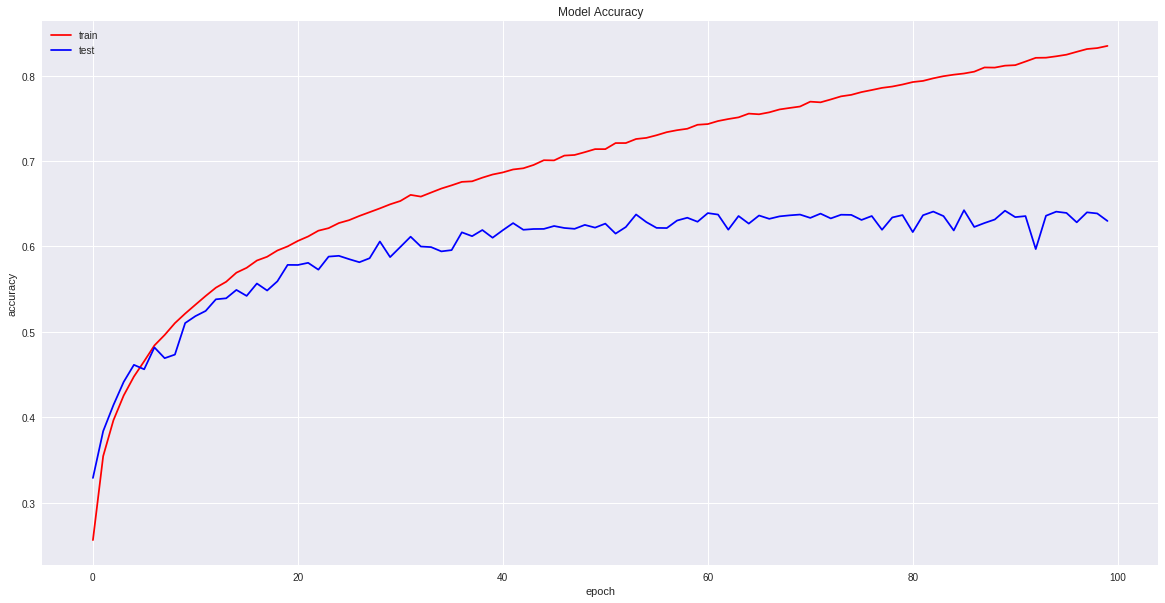

In [24]:
# list all data in history
# summarize history for accuracy
plt.figure(figsize=(20,10))
plt.plot(history_1.history['acc'], color = 'r')
plt.plot(history_1.history['val_acc'], color = 'b')

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()


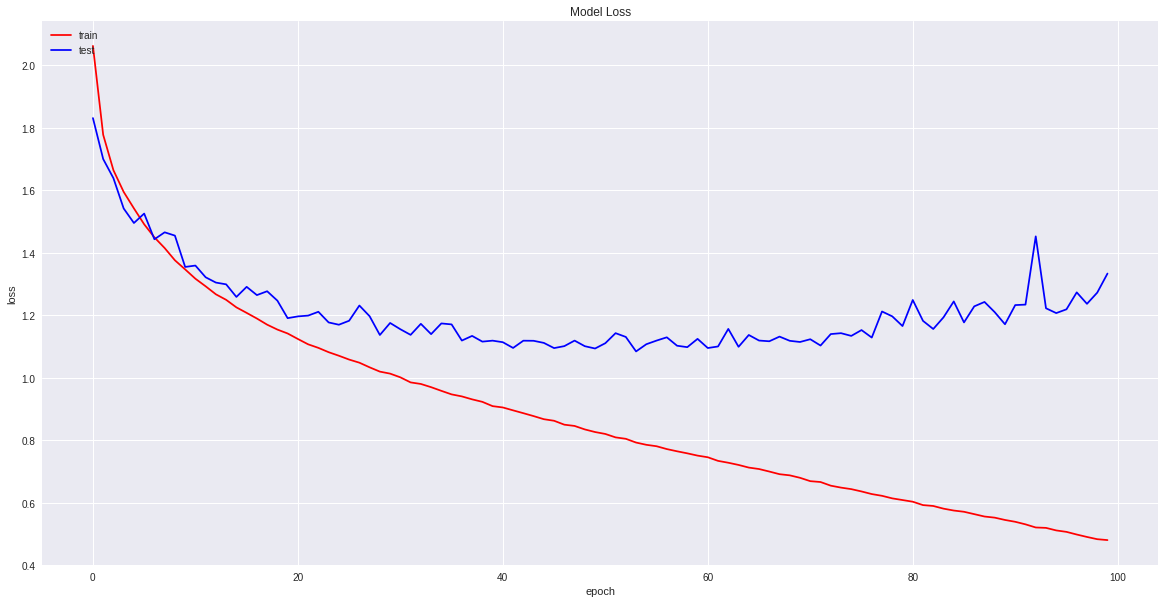

In [25]:
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(history_1.history['loss'], color = 'r')
plt.plot(history_1.history['val_loss'], color = 'b')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        3.0G        165M        253M        9.6G        9.2G
Swap:            0B          0B          0B
